In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
zer=zipfile.ZipFile('drive/My Drive/project_data/flowers-recognition.zip','r')
zer.extractall()
zer.close()

In [5]:
import os
from tqdm import tqdm
import cv2
import numpy as np
import random as rn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
flow=[]
lab=[]
img_size=150
flo_daisy='flowers/daisy'
flo_dand='flowers/dandelion'
flo_rose='flowers/rose'
flo_sun='flowers/sunflower'
flo_tulip='flowers/tulip'

In [0]:
def assign_label(img,flo_type):
  return flo_type

In [0]:
def train(flo_type,dir):
  for img in tqdm(os.listdir(dir)):
    label=assign_label(img,flo_type)
    path=os.path.join(dir,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(img_size,img_size))
    
    flow.append(np.array(img))
    lab.append(str(label))
    

In [31]:
len(flow)

3371

In [9]:
train('Daisy',flo_daisy)

100%|██████████| 769/769 [00:01<00:00, 425.00it/s]


In [11]:
train('Dandelion',flo_dand)

  3%|▎         | 36/1055 [00:00<00:02, 358.50it/s]


error: ignored

In [12]:
train('Rose',flo_rose)

100%|██████████| 784/784 [00:01<00:00, 458.41it/s]


In [13]:
train('Sunflower',flo_sun)

100%|██████████| 734/734 [00:02<00:00, 351.67it/s]


In [14]:
train('Tulip',flo_tulip)

100%|██████████| 984/984 [00:02<00:00, 409.58it/s]


Text(0.5, 1.0, 'Sunflower')

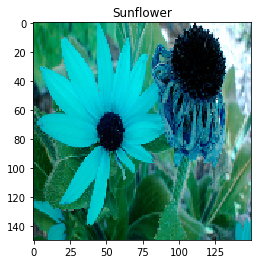

In [15]:
l=1800

plt.imshow(flow[l])
plt.title(lab[l])

In [0]:
le=LabelEncoder()
Y=le.fit_transform(lab)



In [0]:
Y=to_categorical(Y,5)
X=np.array(flow)
X=X/255

In [18]:
X.shape


(3371, 150, 150, 3)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)


In [22]:
import time
dense_layers=[1,2]
layer_sizes=[32,96,64]
conv_layers=[2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
          NAME="{}--conv, {}--nodes, {}--dense {}".format(conv_layer,layer_size,dense_layer,int(time.time()))
          print(NAME)
          
          model=Sequential()
          
          model.add(Conv2D(layer_size, (3, 3), input_shape=(150,150,3)))
          model.add(Activation('relu'))
          model.add(MaxPooling2D(pool_size=(2, 2)))
          
          for l in range(conv_layer-1):
            model.add(Conv2D(layer_size, (3, 3)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            
          model.add(Flatten())
          
          for _ in range(dense_layer):
            
            model.add(Dense(layer_size))
            model.add(Activation('relu'))
            
          model.add(Dense(5))
          model.add(Activation('softmax'))
         

          
#           tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

          model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )
         
          history=model.fit(x_train, y_train,
                      batch_size=32,
                      epochs=3,
                      validation_split=0.3)
#                       
#           plt.plot(history.history['acc'])
#           plt.plot(history.history['val_acc'])
#           plt.title('model accuracy')
#           plt.ylabel('accuracy')
#           plt.xlabel('epoch')
#           plt.legend(['train', 'test'], loc='upper left')
#           plt.show()

          

W0723 19:54:18.447132 140540471551872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 19:54:18.491749 140540471551872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 19:54:18.498221 140540471551872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 19:54:18.534076 140540471551872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0723 19:54:18.594623 140540471551872 deprecation_wrapp

2--conv, 32--nodes, 1--dense 1563911658


W0723 19:54:18.763166 140540471551872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0723 19:54:18.842972 140540471551872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1769 samples, validate on 759 samples
Epoch 1/3
1769/1769 [==============================] - 9s 5ms/step - loss: 1.1838 - acc: 0.4969 - val_loss: 1.0390 - val_acc: 0.5823
Epoch 2/3
1769/1769 [==============================] - 3s 2ms/step - loss: 0.9373 - acc: 0.6246 - val_loss: 1.0202 - val_acc: 0.5731
Epoch 3/3
1769/1769 [==============================] - 3s 2ms/step - loss: 0.7888 - acc: 0.7010 - val_loss: 1.0572 - val_acc: 0.5784
3--conv, 32--nodes, 1--dense 1563911673
Train on 1769 samples, validate on 759 samples
Epoch 1/3
1769/1769 [==============================] - 3s 2ms/step - loss: 1.2072 - acc: 0.4884 - val_loss: 1.1358 - val_acc: 0.5494
Epoch 2/3
1769/1769 [==============================] - 3s 2ms/step - loss: 1.0009 - acc: 0.6032 - val_loss: 1.0488 - val_acc: 0.5916
Epoch 3/3
1769/1769 [==============================] - 3s 2ms/step - loss: 0.9284 - acc: 0.6484 - val_loss: 0.9660 - val_acc: 0.6324
2--conv, 96--nodes, 1--dense 1563911683
Train on 1769 samples, valid

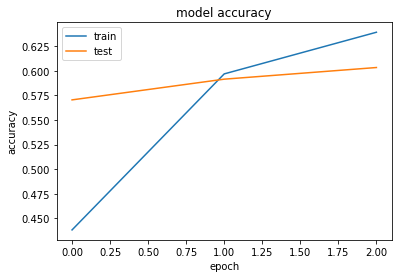

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [0]:
model=Sequential()

model.add(Conv2D(32,  (3,3),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(5,5)))
# model.add(Dropout(0.2))

model.add(Conv2D(96,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))
# model.add(Dropout(0.2))

model.add(Conv2D(96,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))




In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(x = x_train, y = y_train, epochs = 40, batch_size =50,validation_data=(x_test,y_test))

# model.fit(x_train, y_train,
#           batch_size=50,
#           epochs=10,
#           verbose=1,
#           validation_data=(x_test, y_test),
#           callbacks=[tbCallBack])

Train on 2528 samples, validate on 843 samples
Epoch 1/40
2528/2528 [==============================] - 5s 2ms/step - loss: 1.1886 - acc: 0.4695 - val_loss: 0.9740 - val_acc: 0.5860
Epoch 2/40
2528/2528 [==============================] - 3s 1ms/step - loss: 0.9229 - acc: 0.6052 - val_loss: 0.9167 - val_acc: 0.6204
Epoch 3/40
2528/2528 [==============================] - 3s 1ms/step - loss: 0.8520 - acc: 0.6555 - val_loss: 0.8506 - val_acc: 0.6536
Epoch 4/40
2528/2528 [==============================] - 3s 1ms/step - loss: 0.7524 - acc: 0.7132 - val_loss: 0.7670 - val_acc: 0.7058
Epoch 5/40
2528/2528 [==============================] - 3s 1ms/step - loss: 0.6838 - acc: 0.7393 - val_loss: 0.7228 - val_acc: 0.7141
Epoch 6/40
2528/2528 [==============================] - 3s 1ms/step - loss: 0.6246 - acc: 0.7638 - val_loss: 0.6833 - val_acc: 0.7343
Epoch 7/40
2528/2528 [==============================] - 3s 1ms/step - loss: 0.5801 - acc: 0.7805 - val_loss: 0.7710 - val_acc: 0.7034
Epoch 8/40
2528

In [28]:
preds = model.evaluate(x=x_test,y=y_test)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

843/843 [==============================] - 1s 963us/step

Loss = 1.1344569285675299
Test Accuracy = 0.7758007120972992


Prediction: Its a Sunflower


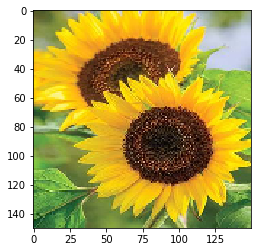

In [30]:
# categories=['Daisy','Dandelion','Rose','Sunflower','Tulip']
def prepare(filepath):
  
  img_size=150
  img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
  
  new_array=cv2.resize(img_array,(img_size,img_size))
  
  we=new_array.reshape(-1,img_size,img_size,3)
  
  
  return we

my_img='suny.jpg'
prediction=model.predict([prepare(my_img)])

img = image.load_img(my_img, target_size=(150, 150))
plt.imshow(img)

# print(prediction)
if prediction[0][0]==1:
  print('Prediction: Its a Daisy')
elif prediction[0][1]==1:
  print('Prediction: Its a Dandelion')
elif prediction[0][2]==1:
  print('Prediction: Its a Rose')
elif prediction[0][3]==1:
  print('Prediction: Its a Sunflower')
elif prediction[0][4]==1:
  print('Prediction: Its a Tulip')
else:
  print('Unknown Flower')
  
